# 导包

In [5]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re,os
from PIL import Image
#pyecharts绘图
from pyecharts.charts import Pie
from pyecharts.charts import Bar
from pyecharts.charts import Line
from pyecharts.charts import Scatter3D
from pyecharts.faker import Faker
from pyecharts.charts import Radar
from pyecharts import options as opts
%matplotlib inline
sns.set_style("darkgrid")
sns.plotting_context("talk")
pd.set_option("display.max_column",None)
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

# 常规赛数据
注：nba历史统计原因，仅存1985-86赛季之后的单场比赛球员数据

In [2]:
#读取常规赛数据
df_season=pd.read_excel(r".\data\regular_seasons.xlsx",engine='openpyxl')

In [4]:
#格式化输出头部5条数据
df_season.head(5)

球员     赛季  果           比赛  首发  时间     投篮  总命中  总出手     三分  三分命中  \
0  1  迈克尔-乔丹  89-90  胜  骑士113-117公牛   1  50  62.2%   23   37  33.3%     2   
1  2  迈克尔-乔丹  92-93  负  魔术128-124公牛   1  47  55.1%   27   49  20.0%     1   
2  3  迈克尔-乔丹  86-87  胜  活塞120-125公牛   1  43  56.4%   22   39            0   
3  4  迈克尔-乔丹  86-87  负  老鹰117-114公牛   1  41  57.9%   22   38   0.0%     0   
4  5  迈克尔-乔丹  87-88  胜  活塞110-112公牛   1  42  77.8%   21   27   0.0%     0   

   三分出手     罚球  罚球命中  罚球出手  篮板  前场  后场  助攻  抢断  盖帽  失误  犯规  得分  
0     6  91.3%    21    23  18   7  11   6   4   1   2   5  69  
1     5  81.8%     9    11   6   4   2   1   5   0   2   5  64  
2     0  94.4%    17    18   7   3   4   3   3   3   5   0  61  
3     3  81.0%    17    21  10   5   5   1   4   1   3   3  61  
4     1  89.5%    17    19   4   2   2   6   2   2   1   4  59

## 各个赛季的场均得分以及胜率

In [89]:
#唯一值unique():相当于把list变成set
season=list(np.sort(df_season["赛季"].unique()))
#按字符串首字母排序，需要手工切片
season=season[2:]+season[:2]
print(season)

['85-86', '86-87', '87-88', '88-89', '89-90', '90-91', '91-92', '92-93', '94-95', '95-96', '96-97', '97-98', '01-02', '02-03']


In [90]:
#map()函数会将指定的函数依次作用于某个序列的每个元素，并返回一个迭代器对象
#https://blog.csdn.net/LuohenYJ/article/details/118977004
df_season["WIN"]=df_season["果"].map({"胜":1,"负": 0})
#pandas数据聚合
#https://blog.csdn.net/weixin_42782150/article/details/90716533
#根据“赛季”键对“WIN”列数据聚合，按照season列表排序，返回numpy对象
WIN_rate=df_season['WIN'].groupby(df_season["赛季"]).mean()[season].values#或者to_numpy
#保留两位小数
WIN_rate=list(np.around(WIN_rate,2))
print(WIN_rate)

[0.5, 0.49, 0.61, 0.58, 0.67, 0.74, 0.84, 0.72, 0.76, 0.88, 0.84, 0.76, 0.5, 0.45]


In [107]:
# 条形图
avg_scores=list(df_season.groupby("赛季")["得分"].mean())
avg_scores=avg_scores[2:]+avg_scores[:2]
avg_scores=list(map(int,avg_scores))
bar=(
    Bar(opts.InitOpts(theme="essos"))
    .add_xaxis(season)
    # 默认轴索引都为0
    .add_yaxis("场均得分",avg_scores,z=0,
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                opts.MarkPointItem(type_="average", name="平均值"),
            ]
        )          
    )
    # 提前配置 折线图 的 y 轴
    .extend_axis(
        # 对新增y轴设置，轴标签为 {} 间隔为0.1
        yaxis=opts.AxisOpts(
            is_show=True,name="胜率",name_location="center",name_gap=40,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        )
    )
    # 系列配置项   不显示标签
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False)
    )
    # 全局配置项
    .set_global_opts(
        # 标题
        title_opts=opts.TitleOpts(title="各个赛季的场均得分以及胜率",pos_left="center"),
        #图例
        legend_opts=opts.LegendOpts(type_="scroll", pos_left="left", orient="vertical"),
        # 对条形图的 y 轴进行设置
        yaxis_opts=opts.AxisOpts(
            is_show=True,name="场均得分",name_location="center",name_gap=40,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        xaxis_opts=opts.AxisOpts(
            name='赛季',name_location='center',name_gap=25,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient="vertical",pos_left='right',)
    )
)
# 折线图
line=(
    Line()
    .add_xaxis(season) # x轴
    .add_yaxis("胜率",list(WIN_rate),yaxis_index=1,is_smooth=True,symbol_size=10,
        linestyle_opts=opts.LineStyleOpts(color="black",width=3,type_="solid"),
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                opts.MarkPointItem(type_="average", name="平均值"),
            ]
        )
    )
)

bar.overlap(line)  # 将折线图重叠到条形图
bar.render_notebook()
#bar.render("overlap_bar_line.html")

## 单场比赛各个得分段占比

In [8]:
scores_level= ["20分及以下","20-30分","30-40分","40-50分","大于50分"]
'''
pandas.cut()数据分箱，将数据分成诺干的部分
pandas 计数函数value_counts()，normalize=True可以计算每一部分出现的频率
values Return a Numpy representation of the DataFrame.
'''
Frequency=pd.cut(df_season["得分"],bins=[0,20,30,40,50,100],labels=scores_level)\
.value_counts(normalize=True)[scores_level].values
Frequency=np.around(Frequency,4)

In [108]:
#绘制饼图
pie=(
    Pie(opts.InitOpts(theme="essos"))
    .add(
        "",
        [list(z) for z in zip(scores_level, Frequency)],
        center=["42%","55%"],#rosetype="area"#radius=["50%","75%"]
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="单场比赛各个得分段占比",pos_left="30%"),
        legend_opts=opts.LegendOpts(is_show=True,pos_left="left",orient="vertical"),
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient="vertical",pos_left='80%',)
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}%")))

In [109]:
pie.render_notebook()

## 乔丹的进攻偏好

In [103]:
#两分出手次数
df_season["两分出手"]=df_season["总出手"]-df_season["三分出手"]

In [110]:
inner_x_data=["两分出手","三分出手"]
inner_y_data=[int(df_season['两分出手'].sum()),int(df_season['三分出手'].sum())]
inner_data_pair=[list(z) for z in zip(inner_x_data,inner_y_data)]
outer_x_data=["罚球得分","两分球得分","三分球得分"]
outer_y_data=[int(df_season['罚球命中'].sum()),
              int((df_season['得分']-df_season["三分命中"]*3-df_season['罚球命中']).sum()),
                int((df_season['三分命中']*3).sum())]
outer_data_pair=[list(z) for z in zip(outer_x_data, outer_y_data)]
#print(outer_data_pair)
pie=(
    Pie(init_opts=opts.InitOpts(width="800px",height="600px",theme='essos',))
    .add(
        series_name="出手选择",
        data_pair=inner_data_pair,
        radius=['20%','40%'],
        label_opts=opts.LabelOpts(position="inner"),
    )
    .add(
        series_name="得分来源",
        radius=["50%","70%"],
        data_pair=outer_data_pair,
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{a|{a}}{abg|}\n{hr|}\n {b|{b}: }{c}  {per|{d}%}  ",
            background_color="#eee",
            border_color="#aaa",
            border_width=1,
            border_radius=4,
            rich={
                "a":{"color":"#999","lineHeight":22,"align":"center"},
                "abg":{
                    "backgroundColor":"#e3e3e3",
                    "width":"100%",
                    "align":"right",
                    "height":22,
                    "borderRadius":[4,4,0,0],
                },
                "hr":{
                    "borderColor":"#aaa",
                    "width":"100%",
                    "borderWidth":0.5,
                    "height":0,
                },
                "b":{"fontSize":16,"lineHeight": 33},
                "per":{
                    "color":"#eee",
                    "backgroundColor":"#334455",
                    "padding":[2,4],
                    "borderRadius":2,
                },
            },
        ),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="得分来源占比（外）和出手选择占比（内）",pos_left='30%'),
        legend_opts=opts.LegendOpts(pos_left="left",orient="vertical"),
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient="vertical",pos_left='right',)
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            trigger="item",formatter="{a} <br/>{b}: {c} ({d}%)"
        )
    )
)

In [111]:
pie.render_notebook()

## 生涯对各个球队的对战情况（场均得分、胜率）柱状图

In [15]:
#Pandas str.findall()方法用于在系列的每个字符串中查找子字符串或分隔符
#汉字匹配
pattern=re.compile(r'[\u4E00-\u9FA5]+')
#提取球队
df_season["team_list"] = df_season["比赛"].str.findall(pattern).map(set)
print(df_season['team_list'])

0       {骑士, 公牛}
1       {魔术, 公牛}
2       {活塞, 公牛}
3       {公牛, 老鹰}
4       {活塞, 公牛}
         ...    
985    {步行者, 奇才}
986     {奇才, 骑士}
987     {奇才, 猛龙}
988     {湖人, 奇才}
989     {奇才, 猛龙}
Name: team_list, Length: 990, dtype: object


In [16]:
#获取球队名 x是元组
def get_oppent(x,num=0):
    period_dict={0:"公牛",1:"奇才"}
    #利用集合获取球队名
    oppent=(x-set([period_dict[num]])).pop()
    if oppent=="人":
        return "76人"
    elif oppent=="凯尔特":
        return "凯尔特人"
    elif oppent=="超音速":
        return "雷霆"
    elif oppent=="子弹":
        return "奇才"
    else:
        return oppent
#将对手存入dataframe， ~series.isin()是series.isin()的逆函数
#效力于公牛队
df_season.loc[~df_season["赛季"].isin(["01-02","02-03"]),"oppent"]=df_season["team_list"].map(lambda x:get_oppent(x,0))
#效力于奇才队
df_season.loc[df_season["赛季"].isin(["01-02","02-03"]),"oppent"]=df_season["team_list"].map(lambda x:get_oppent(x,1))

In [117]:
from pyecharts.options.global_options import ThemeType
from pyecharts.commons.utils import JsCode
avg_scores=df_season.groupby("oppent")["得分"].mean().sort_values(ascending=False)
oppent_team_list=list(avg_scores.index)
avg_scores=list(np.around(avg_scores.values,2))
oppent_win_rate=df_season.groupby("oppent")["WIN"].mean()[oppent_team_list]
oppent_win_rate=list(np.around(oppent_win_rate.values,3))
#print(oppent_team_list)
bar=(
    Bar(
        init_opts=opts.InitOpts(
            width='1200px',height='600px',
            theme=ThemeType.MACARONS,
            bg_color={"type": "pattern", "image": JsCode("img"), "repeat": "no-repeat"},
        )
    )
    .add_xaxis(oppent_team_list)
    # 默认轴索引都为0
    .add_yaxis("场均得分",avg_scores)#,category_gap="40%")
    .extend_axis(
        # 对新增y轴设置，轴标签为 {} 间隔为0.1
        yaxis=opts.AxisOpts(
            name='胜率',name_location='center',name_gap=30,
            interval=0.1,position='right',
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        )
    )
    # 系列配置项   不显示标签
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False,position='top')
    )
    # 全局配置项
    .set_global_opts(
        # 标题
        title_opts=opts.TitleOpts(title="对阵联盟各个球队的场均得分与胜率",pos_left="center"),
        #图例
        legend_opts=opts.LegendOpts(is_show=True,pos_left='left',orient='vertical'),
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient="vertical",pos_left='right'),
        # 对条形图的 y 轴进行设置
        yaxis_opts=opts.AxisOpts(
            name="场均得分",name_location="center",name_gap=25,
            splitline_opts=opts.SplitLineOpts(is_show=True),
            #对轴线进行设置
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            #对刻度线进行设置
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        #对条形图的x轴进行设置
        xaxis_opts=opts.AxisOpts(
            name='球队',name_location='center',name_gap=25,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis", axis_pointer_type="cross"),
    )
)
bar.add_js_funcs(
    """
    var img = new Image(); img.src = 'https://images3.alphacoders.com/106/1063629.jpg';
    """
)
bar_win_rate = (
    Bar()
    .add_xaxis(oppent_team_list) # x轴
    .add_yaxis(
        "胜率",oppent_win_rate,yaxis_index=1,category_gap="30%",
        markpoint_opts=opts.MarkPointOpts(
            data=[
                opts.MarkPointItem(type_="max", name="最大值"),
                opts.MarkPointItem(type_="min", name="最小值"),
                opts.MarkPointItem(type_="average", name="平均值"),
            ]
        )      
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=True))
)
bar.overlap(bar_win_rate)

In [118]:
bar.render_notebook()

## 常规赛胜负的分差状况

In [21]:
#获取比分
pattern=re.compile("(\d+)-(\d+)")
print(df_season["比赛"].str.findall(pattern))
#获取比分差
df_season["diff"]=df_season["比赛"].str.findall(pattern).map(lambda x:np.abs(int(x[0][0])-int(x[0][1])))  
print(df_season['diff'])

0      [(113, 117)]
1      [(128, 124)]
2      [(120, 125)]
3      [(117, 114)]
4      [(110, 112)]
           ...     
985     [(108, 81)]
986    [(100, 107)]
987      [(89, 86)]
988     [(113, 93)]
989      [(82, 95)]
Name: 比赛, Length: 990, dtype: object
0       4
1       4
2       5
3       3
4       2
       ..
985    27
986     7
987     3
988    20
989    13
Name: diff, Length: 990, dtype: int64


Text(0, 0.5, '比赛结果')

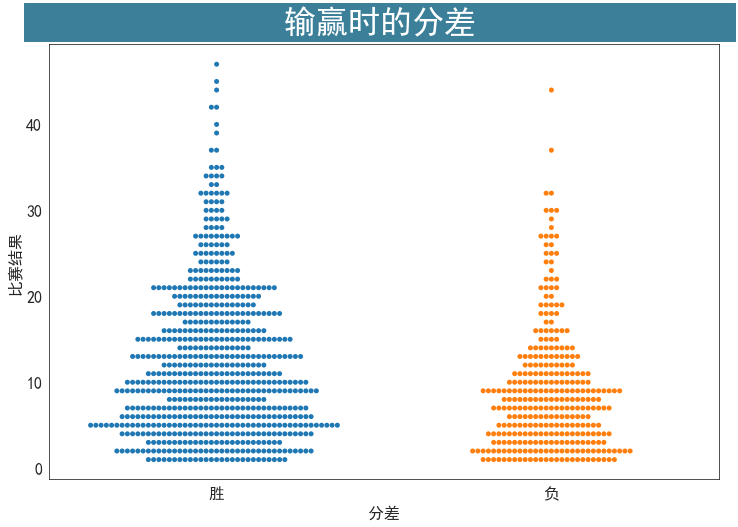

In [88]:
fig,ax = plt.subplots(figsize=(12,8))
sns.swarmplot(x="果",y="diff",data=df_season) 
fig.text(x=0.1, y=0.90, s='                输赢时的分差                ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlabel("分差",fontsize=16)
plt.ylabel("比赛结果",fontsize=16)

<font color=#0099ff size=6 face="黑体"> 季后赛数据 </font>

In [3]:
#读取季后赛数据
df_playoff=pd.read_excel(r".\data\playoffs.xlsx",engine='openpyxl')

## 乔丹的季后赛之路

#### 胜负关系转换

In [24]:
df_playoff["WIN"]=df_playoff["果"].map({"胜":1,"负":0})

In [25]:
#获取球队列表
pattern=re.compile(r'[\u4E00-\u9FA5]+')
df_playoff["team_list"]=df_playoff["比赛"].str.findall(pattern).map(set)
df_playoff.loc[:,"oppent"]=df_playoff["team_list"].map(lambda x:get_oppent(x,0))
#print(df_playoff.loc[:'oppent'])

In [26]:
#以“WIN”为键值，依次按照赛季、轮次、对手分组
df_playwith=df_playoff.groupby(["赛季","轮次","oppent"])["WIN"].mean().reset_index()
#print(df_playwith)

In [27]:
#将12个赛季对应为12个序号
season_dict=dict(zip(df_playwith["赛季"].unique(),[i for i in range(12)]))
print(season_dict)
df_playwith["season"]=df_playwith["赛季"].map(season_dict) 
#print(df_playwith["season"])

{'85-86': 0, '86-87': 1, '87-88': 2, '88-89': 3, '89-90': 4, '90-91': 5, '91-92': 6, '92-93': 7, '94-95': 8, '95-96': 9, '96-97': 10, '97-98': 11}


In [28]:
horizon=[0.11,0.18,0.24,0.30,0.37,0.43,0.50,0.56,0.63,0.69,0.76,0.82]
vertical=[0.13,0.35,0.58,0.79]

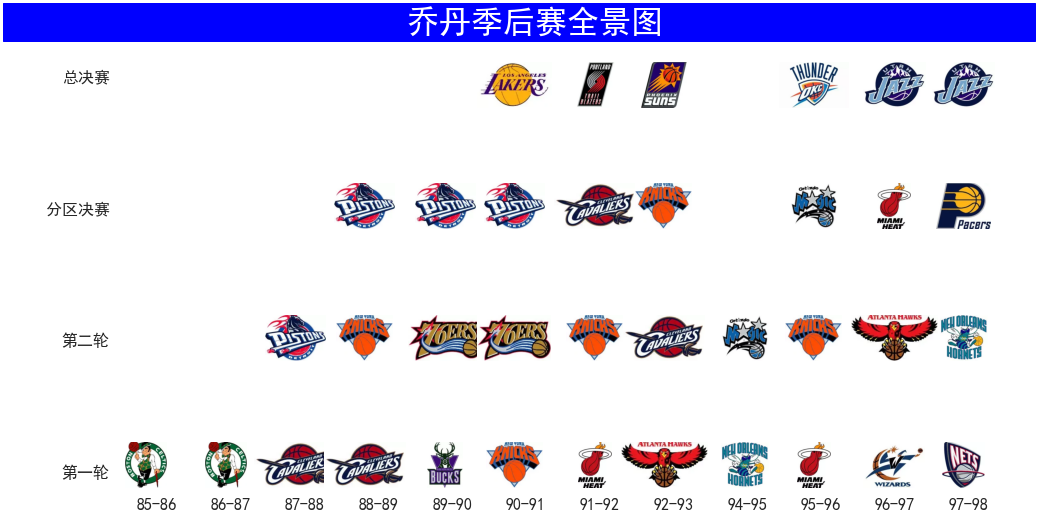

In [30]:
#绘制季后赛全景图
fig,ax=plt.subplots(figsize=(16,8))
#绘制字体窗口
fig.text(x=0.03,y=0.92,s='                         乔丹季后赛全景图                       ', 
         fontsize=32, 
         weight='bold',
         color='white',
         backgroundcolor='#0000FF')
#绘制散点图
plt.scatter(df_playwith["赛季"], df_playwith["轮次"], alpha=0.35)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.box(False)
#设置y轴刻度位置和标签
plt.yticks([1,2,3,4],labels=["第一轮","第二轮","分区决赛","总决赛"])
#将图片内置到全景图中
for index in range(len(df_playwith)):
    season=df_playwith.iloc[index,4]
    th_round=df_playwith.iloc[index,1]-1 
    team_name=df_playwith.iloc[index,2]
    left,bottom,width,height=horizon[season],vertical[th_round],0.08,0.08
    #新建子区域
    ax2=fig.add_axes([left,bottom,width,height])
    img=Image.open("./picture/{team_name}.jpg".format(team_name=team_name))
    ax2.imshow(img)
    ax2.axis('off') # 关掉坐标轴为 off

## 季后赛各轮次的输赢分差

In [31]:
pattern=re.compile("(\d+)-(\d+)")
df_playoff["diff"]=df_playoff["比赛"].str.findall(pattern).map(lambda x:np.abs(int(x[0][0])-int(x[0][1])))

In [140]:
scatter_data=list(zip(list(df_playoff['WIN']),list(df_playoff['轮次']),list(df_playoff['diff'])))
scatter_data=sorted(scatter_data,key=lambda x:(x[0],x[2],x[1]))
#print(scatter_data)
scatter=(
    Scatter3D(init_opts=opts.InitOpts(width='800px',height='500px',theme='essos'))  #初始化
    .add(
        "",scatter_data,
        xaxis3d_opts=opts.Axis3DOpts(
            name='胜负关系',
            type_="category",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        yaxis3d_opts=opts.Axis3DOpts(
            name='季后赛轮次',
            type_="category",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        zaxis3d_opts=opts.Axis3DOpts(
            name='分差',
            type_="value",
            # textstyle_opts=opts.TextStyleOpts(color="#fff"),
        ),
        grid3d_opts=opts.Grid3DOpts(width=100,depth=100,rotate_speed=10,is_rotate=True)
    )
    #设置全局配置项
    .set_global_opts(
        title_opts=opts.TitleOpts(title="季后赛各轮次的输赢分差"),  #添加标题
        toolbox_opts=opts.ToolboxOpts(is_show=True,orient="vertical",pos_left='right'),
        visualmap_opts=opts.VisualMapOpts(
            type_='color',
            max_=45, #最大值
            pos_top=50, # visualMap 组件离容器上侧的距离
            range_color=['#e0c3c9','#d68595','#cf435f','#a11833','#611020','#1c0409'],                                      
        )
    )
)
scatter.render_notebook()

## 常规赛和季后赛场均得分对比

In [40]:
#常规赛得分列表
season_scores=list(np.around(df_season.groupby("赛季")["得分"].mean().values[2:],2))
#季后赛得分列表
#print(season_scores)
playoff_scores=list(np.around(df_playoff.groupby("赛季")["得分"].mean().values,2))
#索引
season=list(df_playoff.groupby("赛季")["得分"].mean().index)
poor_scores=list(map(lambda x:x[1]-x[0],zip(season_scores,playoff_scores)))
poor_scores=[round(x,2) for x in poor_scores]
#print(poor_scores)
#print(index)

In [141]:
colors = ["#5793f3", "#d14a61", "#675bba"]
bar = (
    Bar(init_opts=opts.InitOpts(width="1100px", height="800px",theme='essos'))
    .add_xaxis(season)
    .add_yaxis("常规赛",season_scores,yaxis_index=0,stack='stack1')
    #额外添加两个y轴
    .add_yaxis("得分差",poor_scores,yaxis_index=1,stack='stack1')
    .extend_axis(
        yaxis=opts.AxisOpts(
            name="常规赛",type_="value",
            min_=0,max_=50,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,color=colors[1])
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        )
    )
    .extend_axis(
        yaxis=opts.AxisOpts(
            type_="value",name="季后赛",
            min_=0,max_=50,offset=60,
            position="right",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,color=colors[2])
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
            splitline_opts=opts.SplitLineOpts(
                is_show=True,linestyle_opts=opts.LineStyleOpts(opacity=1)
            ),
        )
    )
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False)
    )
    .set_global_opts(
        # 标题
        title_opts=opts.TitleOpts(title="常规赛和季后赛场均得分对比",pos_left="center"),
        #图例
        legend_opts=opts.LegendOpts(is_show=True,pos_left='left',orient='vertical'),
        yaxis_opts=opts.AxisOpts(
            type_="value",name="得分差",
            min_=0,max_=50,position="left",
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,color=colors[0])
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        xaxis_opts=opts.AxisOpts(
            name='赛季',name_location='center',name_gap=25,
            axisline_opts=opts.AxisLineOpts(
                linestyle_opts=opts.LineStyleOpts(width=2,)
            ),
            axistick_opts=opts.AxisTickOpts(is_inside=True),
        ),
        tooltip_opts=opts.TooltipOpts(trigger="axis",axis_pointer_type="cross"),
    )
)

bar_playoff_scores = (
    Bar()
    .add_xaxis(season)
    .add_yaxis("季后赛",playoff_scores,yaxis_index=2,)
)
bar.overlap(bar_playoff_scores).render_notebook()


In [7]:
list_radar=['篮板','前场','后场','助攻','抢断','盖帽']
season_radar=[]
playoff_radar=[]
#print(df_season[list_radar[0]])
for i in range(6):
    season_radar.append(np.around(df_season[list_radar[i]].mean(),3).astype(float))
for i in range(6):
    playoff_radar.append(np.around(df_playoff[list_radar[i]].mean(),3).astype(float))
c = (
    Radar(init_opts=opts.InitOpts(theme='essos'))
    .add_schema(
        schema=[
            opts.RadarIndicatorItem(name="篮板", max_=8),
            opts.RadarIndicatorItem(name="前场", max_=8),
            opts.RadarIndicatorItem(name="后场", max_=8),
            opts.RadarIndicatorItem(name="助攻", max_=8),
            opts.RadarIndicatorItem(name="抢断", max_=8),
            opts.RadarIndicatorItem(name="盖帽", max_=8),
        ],
        splitarea_opt=opts.SplitAreaOpts(
            is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
        ),
        textstyle_opts=opts.TextStyleOpts(color="#000000"),
    )
    .add(
        series_name="常规赛",
        data=[season_radar],
        areastyle_opts=opts.AreaStyleOpts(color="#FF0000",opacity=0.2), # 区域面积，透明度
    )
    .add(
        series_name="季后赛",
        data=[playoff_radar],
        areastyle_opts=opts.AreaStyleOpts(color="#00BFFF",opacity=0.2), # 区域面积，透明度
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="乔丹属性雷达图"), 
#         legend_opts=opts.LegendOpts(selected_mode="single"),  # 可以设置单一选择查看
    )
#     .render("标准球员属性雷达图.html")
)
c.render_notebook()